Importer les bib 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [3]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=['date'], index_col='date')

In [10]:
df.head(10)

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
2016-06-07,18335
2016-06-08,18072
2016-06-09,18139
2016-06-14,19395


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [4]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

In [5]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df['value'], color='red', linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    fig.savefig('line_plot.png')

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [6]:
def draw_bar_plot():
    # Préparation des données
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    # Moyenne par mois et année
    df_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Tracé
    fig = df_grouped.plot(kind='bar', figsize=(12, 8)).figure
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title='Months')
    plt.tight_layout()
    fig.savefig('bar_plot.png')

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [7]:
def draw_box_plot():
    df_box = df.copy().reset_index()
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month

    # Ordre des mois
    df_box = df_box.sort_values('month_num')

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    fig.savefig('box_plot.png')

Execution de Programme

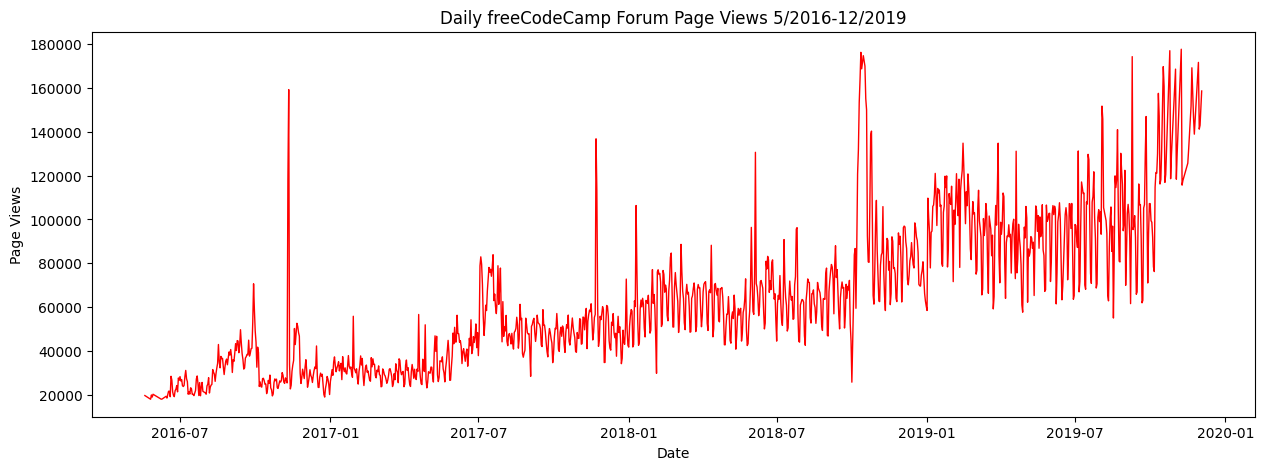

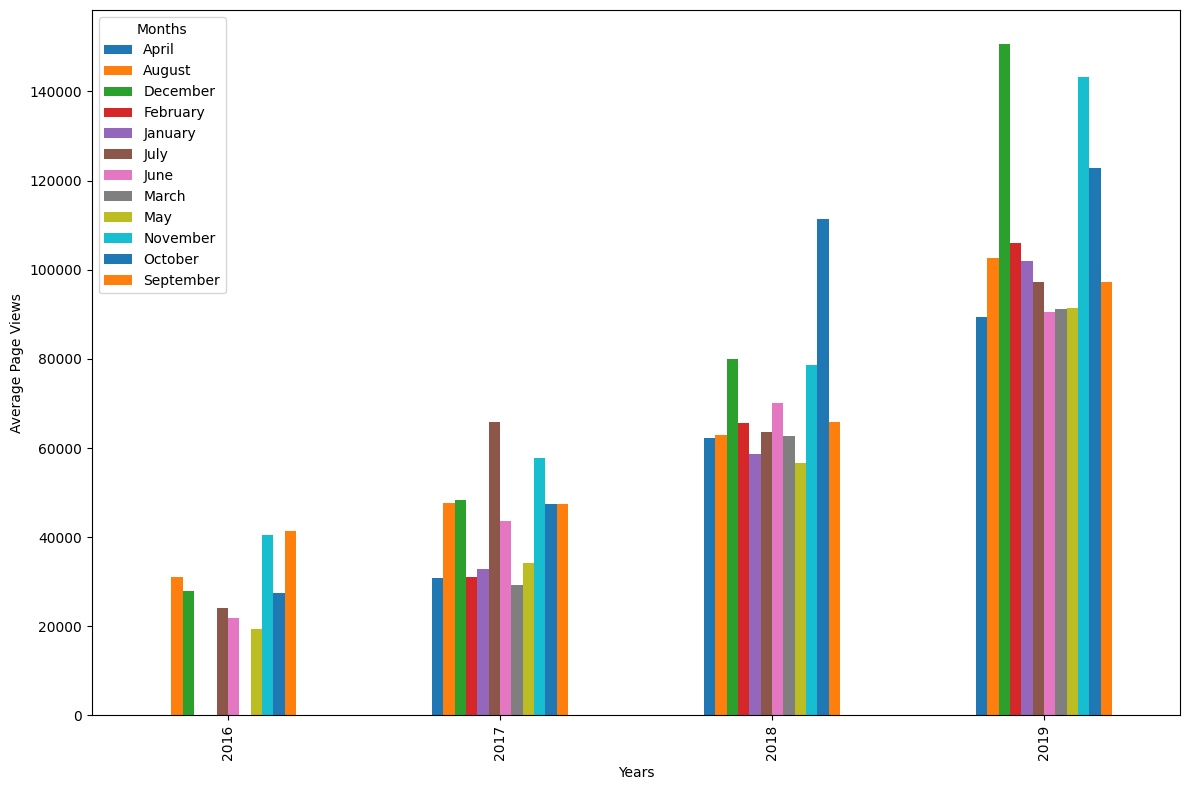

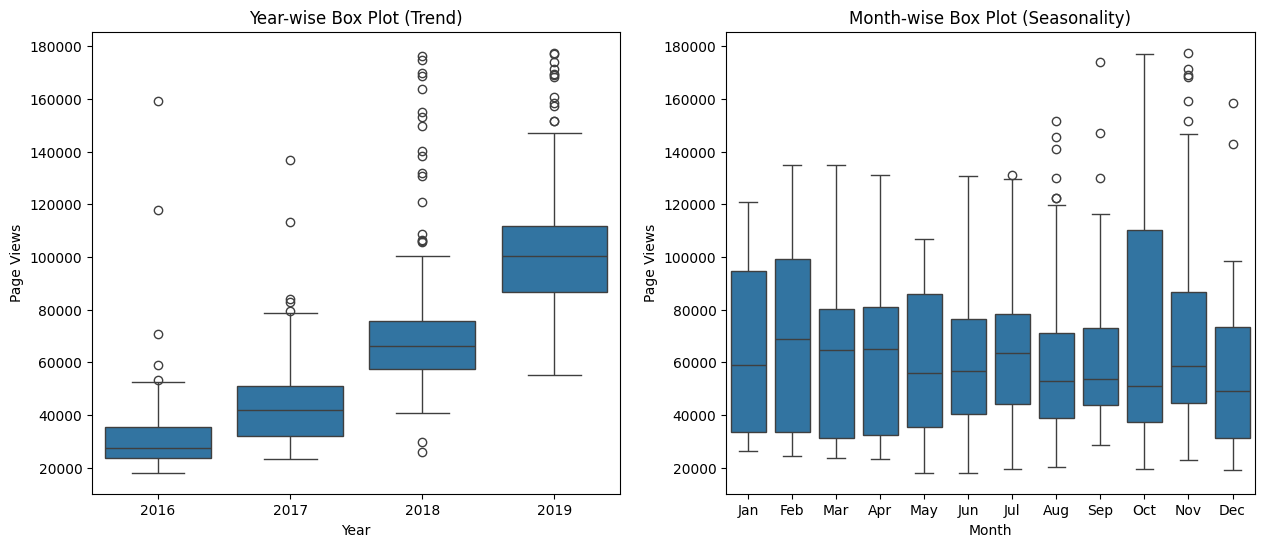

In [8]:
draw_line_plot()
draw_bar_plot()
draw_box_plot()